# 🧠 Customer Churn Prediction

## Load the Dataset

In [5]:
import pandas as pd
import numpy as np

In [6]:
# Load the dataset
df=pd.read_csv("/content/customer_Leave_or_Stay.csv")
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


##  Exploratory Data Analysis (EDA)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# Visualize key relationships and distributions.
import matplotlib.pyplot as plt
import seaborn as sns

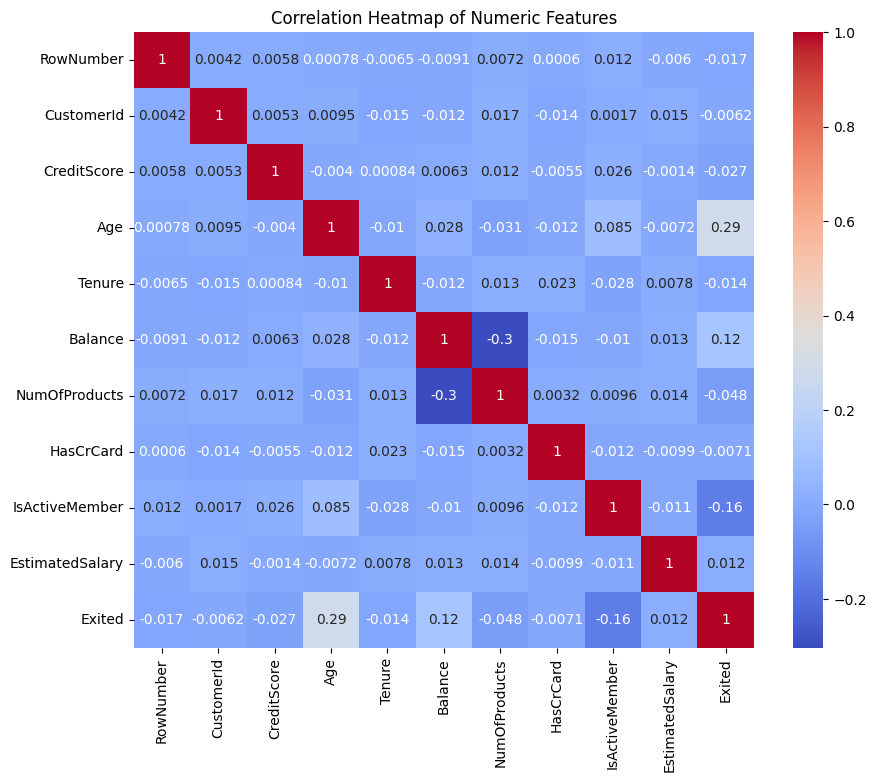

In [9]:
# Correlation heatmap (for numeric columns)
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## 🧼 4. Data Preprocessing

Clean the data and prepare it for training.

In [10]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [11]:
x=df.iloc[:,3:-1]
y=df.iloc[:,-1]

In [35]:
y.value_counts()

,count
Exited,
0,7963
1,2037


In [12]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [13]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [14]:
x=pd.get_dummies(x,columns=['Geography','Gender'],drop_first=True,dtype=int)
x.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0


In [15]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


##  Train-Test Split and Apply Scaling


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
y_train.value_counts()

,count
Exited,
0,6356
1,1644


In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [18]:
x_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [19]:
x_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

## Model Training (Logistic Regression)
Train a simple model to start with.

In [20]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(x_train, y_train)
y_pred_logistic = model_logistic.predict(x_test)


## 📏 7. Model Evaluation
Check how well your model performs.

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy of logistic model is: \n", accuracy_score(y_test, y_pred_logistic)*100)
print("\n Confusion Matrix of logistic model: \n")
print(confusion_matrix(y_test, y_pred_logistic))
print("\nClassification Report of logistic model:\n")
print(classification_report(y_test, y_pred_logistic))


Accuracy of logistic model is: 
 81.10000000000001

 Confusion Matrix of logistic model: 

[[1543   64]
 [ 314   79]]

Classification Report of logistic model:

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



# **KNN**

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier()
model_knn.fit(x_train,y_train)
y_pred_knn=model_knn.predict(x_test)
print("Accuracy of knn model is: \n", accuracy_score(y_test, y_pred_knn)*100)
print("\n Confusion Matrix of knn: \n")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report of knn:\n")
print(classification_report(y_test, y_pred_knn))


Accuracy of knn model is: 
 83.0

 Confusion Matrix of knn: 

[[1514   93]
 [ 247  146]]

Classification Report of knn:

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000



# **Support Vector Machine**

In [23]:
from sklearn.svm import SVC
model_svm=SVC()
model_svm.fit(x_train,y_train)
y_pred_svm=model_svm.predict(x_test)
print("Accuracy of svm model is: \n", accuracy_score(y_test, y_pred_svm)*100)
print("\n Confusion Matrix of svm: \n")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report of svm:\n")
print(classification_report(y_test, y_pred_svm))

Accuracy of svm model is: 
 85.6

 Confusion Matrix of svm: 

[[1562   45]
 [ 243  150]]

Classification Report of svm:

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.38      0.51       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.71      2000
weighted avg       0.85      0.86      0.84      2000



# **Decision Tree Classifier**

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_tree=DecisionTreeClassifier()
model_tree.fit(x_train,y_train)
y_pred_tree=model_tree.predict(x_test)
print("Accuracy of decision tree model is: \n", accuracy_score(y_test, y_pred_tree)*100)
print("\n Confusion Matrix of decision tree: \n")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report of decision tree:\n")
print(classification_report(y_test, y_pred_tree))



Accuracy of decision tree model is: 
 78.10000000000001

 Confusion Matrix of decision tree: 

[[1365  242]
 [ 196  197]]

Classification Report of decision tree:

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.45      0.50      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000



# **Random Forest Classifier**

In [25]:
from sklearn.ensemble import RandomForestClassifier
model_forest=RandomForestClassifier(n_estimators=1500,random_state=42)
model_forest.fit(x_train,y_train)
y_pred_forest=model_forest.predict(x_test)
print("Accuracy of random forest model is: \n", accuracy_score(y_test, y_pred_forest)*100)
print("\n Confusion Matrix of random forest: \n")
print(confusion_matrix(y_test, y_pred_forest))
print("\nClassification Report of random forest:\n")
print(classification_report(y_test, y_pred_forest))

Accuracy of random forest model is: 
 86.75

 Confusion Matrix of random forest: 

[[1548   59]
 [ 206  187]]

Classification Report of random forest:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000



# **Random Forest Classifier With Class Balance**

In [30]:
rf_model_balanced = RandomForestClassifier(n_estimators=1500, random_state=42,class_weight='balanced')
rf_model_balanced.fit(x_train, y_train)
y_pred_rf_balanced = rf_model_balanced.predict(x_test)
print("Random Forest:")

print(classification_report(y_test, y_pred_rf_balanced))
print(confusion_matrix(y_test, y_pred_rf_balanced))
print("Accuracy:", accuracy_score(y_test, y_pred_rf_balanced)*100)

Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000

[[1557   50]
 [ 211  182]]
Accuracy: 86.95


# **XGB Classifier**

In [27]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(x_train,y_train)
y_pred_xgb=model_xgb.predict(x_test)
print("Accuracy of xgb model is: \n", accuracy_score(y_test, y_pred_xgb)*100)
print("\n Confusion Matrix of xgb: \n")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report of xgb:\n")
print(classification_report(y_test, y_pred_xgb))

Accuracy of xgb model is: 
 86.95

 Confusion Matrix of xgb: 

[[1521   86]
 [ 175  218]]

Classification Report of xgb:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1607
           1       0.72      0.55      0.63       393

    accuracy                           0.87      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg       0.86      0.87      0.86      2000



#  Gradient Boosting Classifier

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb=GradientBoostingClassifier()
model_gb.fit(x_train,y_train)
y_pred_gb=model_gb.predict(x_test)
print("Accuracy of gb model is: \n", accuracy_score(y_test, y_pred_gb)*100)
print("\n Confusion Matrix of gb: \n")
print(confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report of gb:\n")
print(classification_report(y_test, y_pred_gb))

Accuracy of gb model is: 
 86.75

 Confusion Matrix of gb: 

[[1543   64]
 [ 201  192]]

Classification Report of gb:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



# **Final Model is XGBoost Classifie**

In [38]:
import joblib
joblib.dump(model_xgb, 'model.pkl')

['model.pkl']

In [39]:
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>